# Исследование продаж компьютерных игр
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

План проекта:
1. Изучить данные и подготовить их для дальнейшего анализа:
- заменить названия столбцов, 
- изменить типы данных, 
- обработать пропуски, 
- посчитать суммарные продажи по регионам и добавить в отдельный столбец
2. Провести исследовательский анализ данных:
- сколько игр выпускалось в разные годы
- как менялись продажи по платформам
- выявить лидеров платформ по продажам
- проанализировать влияние отзывов пользователей и оценки критиков на продажи
- выявить самые прибыльные жанры игр
3. Составить портрет пользователя по регионам (NA, EU, JP):
- определить самые популярные платформы
- определить самые популярные жанры
- определить, влияет ли рейтинг ESRB на продажи в отдельном регионе
4. Проверить гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковы
- средние пользовательские рейтинги жанров Action и Sports разные
5. Сделать выводы по полученным результатам исследования

### Общая информация датасета и предобработка данных
Посмотрим на данные в датасете: какое количество строк и столбцов, какие названия они имеют, есть ли пропуски в данных, какие типы данных в ячейках.

#### Общий анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns

# для округления до двух знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 16715 строк, 11 столбцов. Названия колонок оформлены не в стиле "snake_case". Есть колонки с пропусками.

Есть проблемы в типах данных столбцов:

Столбец "Year_of_Release" имеет тип float64, хотя это год и может быть только целым числом.
Столбец "Critic_Score" имеет только целые значения, тип данных float64.
Но в этих столбцах есть пропущенные значения, которые мы не сможем заполнить, поэтому оставим тип float.

In [3]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В столбце "User_Score" есть значения "tbd" - to be determined (будет определено позднее). Нам этот вариант не принесет никакой пользы, заменим в п.1.4 эти значения на пропуски, а потом изменим тип столбца на float.

In [4]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#### Гистограмма для всех столбцов датасета

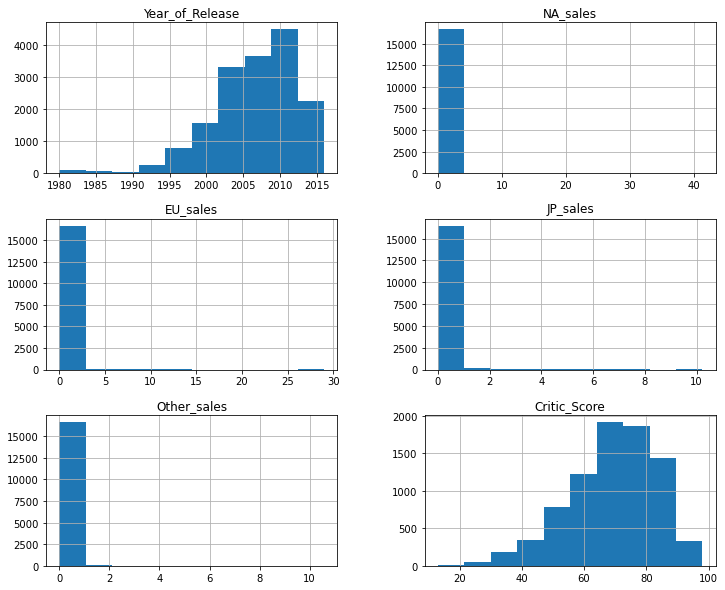

In [5]:
data.hist(figsize=(12, 10));

На графиках наглядно видно дельту годов выпуска игр нашего датасета, продаж игр по 4-м регионам и распределение оценок критиков игр.  

#### Замена названий столбцов
Сначала изменим названия столбцов в едином стиле: только строчные буквы и с нижним подчеркиванием. Также приведем все содержимое категориальных столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data['name'] = data['name'].str.lower()

In [8]:
# проверим названия столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменение типов данных
В столбце 'user_score' 2424 значений 'tbd'.

In [9]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,"2,010.00",sports,3.45,2.59,0.00,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,"2,005.00",misc,2.08,1.35,0.00,0.54,61.00,tbd,e10+
520,zumba fitness 2,wii,"2,011.00",sports,1.51,1.03,0.00,0.27,NaN,tbd,t
645,udraw studio,wii,"2,010.00",misc,1.65,0.57,0.00,0.20,71.00,tbd,e
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.00,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,"2,001.00",action,0.01,0.00,0.00,0.00,67.00,tbd,e
16697,bust-a-move 3000,gc,"2,003.00",puzzle,0.01,0.00,0.00,0.00,53.00,tbd,e
16698,mega brain boost,ds,"2,008.00",puzzle,0.01,0.00,0.00,0.00,48.00,tbd,e
16704,plushees,ds,"2,008.00",simulation,0.01,0.00,0.00,0.00,NaN,tbd,e


In [10]:
# Изменим тип данных на float64, причем все ошибки (значения "tbd") заменятся на nan благодаря атрибуту errors='coerce'
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [11]:
# Проверим уникальные значения - tbd пропали, данные стали float
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

#### Суммарные продажи
Добавим столбец "total_sales", в котором просуммируем все продажи по регионам для каждой игры.

In [12]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [13]:
# проверим
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Обработка пропусков

Выведем графики для наглядности количества пропусков в столбцах.

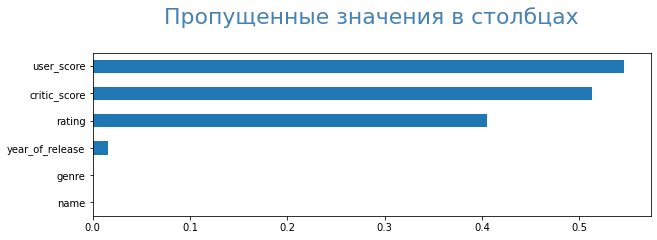

In [14]:
def pass_value_barh(df):
    (
        (df.isna().mean())
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(10,3), legend = False)
        .set_title('Пропущенные значения в столбцах' + "\n", fontsize = 22, color = 'SteelBlue')    
    );

#Вызов функции:
pass_value_barh(data)

##### Название игры и жанра
В столбце "name" всего 2 пропуска, в этих же строках пропущены названия жанров, удалим эти строки из датасета.

In [15]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [16]:
data = data.dropna(subset=['name'])

##### Оценка пользователей, оценка критиков, рейтинг ESRB
В этих столбцах много пропусков, мы не можем заполнить столбцы с оценкой пользоваталей и критиков, так как эти игры просто не оценивали. Оставим эти пропуски.

Рейтинг ESRB - это категориальные данные. Рассмотрим их поближе.

In [17]:
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [18]:
data['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
k-a        3
rp         3
ao         1
Name: rating, dtype: int64

Рейтинг ESRB играм присваивается американской компанией. Скорее всего эта организация делает упор на игры, которые продаются в Северной Америке, и ее меньше интересуют продаваемые игры в других регионах. На это косвенно указывает большая часть японских игр без рейтинга ESRB.
Если у игры не заполнен этот столбец, скорее всего этой игре не присвоили рейтинг ESRB. Чтобы не потерять при дальнейшем анализе данные игр без рейтинга, присвоим им значение 'no rating'.

Также есть 3 игры с рейтингом "rp" - рейтинг ожидается, заменим его на "no rating", так как по сути у этих игр тоже пока нет рейтинга.

Есть всего одна игра для взрослых (18+), добавим ее в группу 17+, это уменьшит количество категорий.

Категория "k-a" ("Kids to Adults") это устаревшее название категории "e"("Everyone"), переименуем 3 игры категории "k-a" на "e".

Игры с категорией "ec" подходят для детей от 3 лет. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone», заменим наши 8 детских игр на игры для любого возраста.

In [19]:
data['rating'] = data['rating'].fillna('no rating')
data['rating'] = data['rating'].where((data['rating'] != 'rp'), 'no rating')
data['rating'] = data['rating'].where((data['rating'] != 'ao'), 'm')
data['rating'] = data['rating'].where((data['rating'] != 'k-a'), 'e')
data['rating'] = data['rating'].where((data['rating'] != 'ec'), 'e')
data['rating'].unique()

array(['e', 'no rating', 'm', 't', 'e10+'], dtype=object)

Мы заполнили все пропуски в столбце рейтинга и уменьшили количество категорий для дальнейшего анализа игр.

##### Год релиза игры

В столбце "year_of_release" 269 пропущенных значений.

In [20]:
data['year_of_release'].isna().sum()

269

In [21]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.00,8.50,e,5.24
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.00,6.40,e,3.50
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.00,7.90,e10+,3.06
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,no rating,3.00
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,no rating,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.00,NaN,e10+,0.01
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.00,6.50,t,0.01
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.00,6.70,m,0.01
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


Сгруппируем игры по названию и, где не заполнен год релиза, установим медианное значение среди этих игр. Скорее всего, если игра выходит на нескольких платформах, она выходит примерно в одно время.

In [22]:
for game in data['name'].unique():
    data.loc[(data['name'] == game) & (data['year_of_release'].isna()), 'year_of_release'] = \
    data.loc[(data['name'] == game), 'year_of_release'].median()

In [23]:
# осталось 146 пустых значений
data['year_of_release'].isna().sum()

146

In [24]:
# посмотрим общую информацию по столбцу "total_sales"
data['total_sales'].describe()

count   16,713.00
mean         0.53
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

Первый квартиль общих сумм продаж менее 0.06 млн. копий. Посмотрим оставшиеся повторные игры, в которых не заполнился год релиза.

In [25]:
data[(data.duplicated(subset='name')) & (data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.00,6.30,t,2.09
1142,rock band,ps3,NaN,misc,0.99,0.41,0.00,0.22,92.00,8.40,t,1.62
1840,rock band,ps2,NaN,misc,0.71,0.06,0.00,0.35,82.00,6.80,t,1.12
3233,test drive unlimited 2,ps3,NaN,racing,0.16,0.34,0.01,0.12,70.00,6.10,t,0.63
4945,robert ludlum's the bourne conspiracy,ps3,NaN,action,0.18,0.14,0.00,0.06,70.00,7.60,t,0.38
4959,silent hill: homecoming,ps3,NaN,action,0.18,0.14,0.00,0.06,71.00,6.90,m,0.38
7735,test drive unlimited 2,pc,NaN,racing,0.05,0.11,0.00,0.03,72.00,5.70,t,0.19
8260,backbreaker,ps3,NaN,sports,0.16,0.00,0.00,0.01,58.00,7.00,e,0.17
8918,all-star baseball 2005,xb,NaN,sports,0.11,0.03,0.00,0.01,75.00,8.80,e,0.15
10993,the daring game for girls,wii,NaN,adventure,0.09,0.00,0.00,0.01,NaN,NaN,e,0.10


Только одна имеет общие продажи более 0.06 млн. - "Rock Band". Заполним эти данные вручную, использовав интернет. Год релиза - 2007 на всех платформах. 

In [26]:
data['year_of_release'] = data['year_of_release'].where((data['name'] != 'Rock Band'), 2007)

Оставшиеся 142 игры без заполненного года релиза удалим, это 0.8% от всех игр в датасете.

In [27]:
data = data.dropna(subset=['year_of_release'])

Сейчас в столбце нет пропусков, можно изменить тип данных на int.

In [28]:
# сбросим индексы у нашей таблицы после удаления строк
data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16562,16710,samurai warriors: sanada maru,ps3,"2,016.00",action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16563,16711,lma manager 2007,x360,"2,006.00",sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16564,16712,haitaka no psychedelica,psv,"2,016.00",adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16565,16713,spirits & spells,gba,"2,003.00",platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


In [29]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [30]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [31]:
# проверим еще раз датасет, пропуски остались только в оценках игр
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


#### Вывод
Проанализировали все данные в датасете, заменили названия столбцов, изменили типы данных, избавились от пропусков, где это возможно, добавили столбцы для дальнейших вычислений. Можно приступать к исследовательскому анализу.

### Исследовательский анализ данных
#### Количество игр в разные годы
Посмотрим, сколько разных игр выпускалось в разные годы.

In [32]:
data['year_of_release'].value_counts().sort_values(ascending=False)

2008    1441
2009    1430
2010    1269
2007    1202
2011    1153
2006    1019
2005     948
2002     844
2003     784
2004     765
2012     662
2015     606
2014     581
2013     548
2016     502
2001     486
1998     379
2000     351
1999     340
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

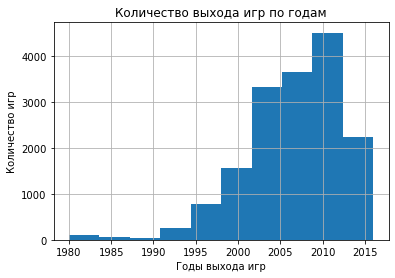

In [33]:
ax = data['year_of_release'].hist()
ax.set_xlabel('Годы выхода игр')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выхода игр по годам');

До 2000 года игр продавалось значительно меньше, чем после 2000 года. Самый "пик" - с 2005 по 2011 года. Для прогноза продаж данные продаж игр ранее 2000 года точно будут неактуальны.

#### Продажи по платформам
Теперь рассмотрим продажи игр на разных платформах. Для начала выведем название платформ, на которых больше всего создано игр. Лидеры: PS2, DS, PS3, Wii, X360, PSP, PS.

In [34]:
data['platform'].value_counts()

ps2     2140
ds      2129
ps3     1320
wii     1301
x360    1250
psp     1203
ps      1190
pc       970
xb       817
gba      813
gc       552
3ds      515
psv      429
ps4      392
n64      318
xone     247
snes     239
sat      173
wiiu     147
2600     117
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

Теперь посчитаем суммарные продажи по каждой платформе. Лидеры: PS2, X360, PS3, Wii, DS, PS. Логично, что лидерами остались те же платформы. Чем больше игр на платформе - тем больше продаж.

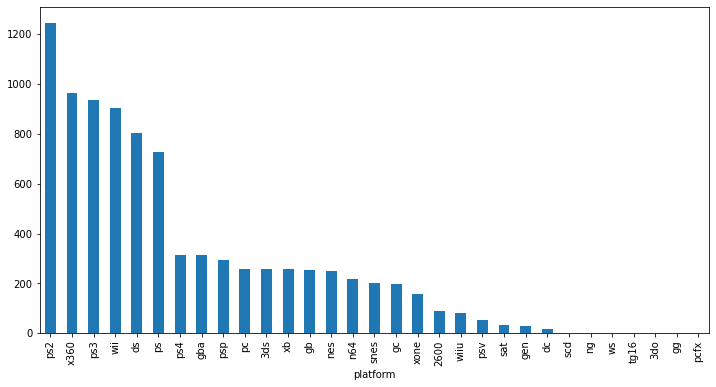

In [35]:
data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)\
    .plot(x='platform', y='total_sales', kind='bar', figsize=(12,6));

In [36]:
# сохраним лидеров продаж в отдельной переменной
lider = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
data_lider = data.query('platform == @lider')
#data_lider.info()

In [37]:
# сгруппировали игры по типу платформы, года выпуска и посчитали суммарные продажи по каждому году,
# вытащили столбцы из индекса
top6 = data_lider.pivot_table(index=['platform', 'year_of_release'], \
                              values=['total_sales'], aggfunc='sum').reset_index()

In [38]:
top6.head(10)

,platform,year_of_release,total_sales
0,ds,1985,0.02
1,ds,2004,17.27
2,ds,2005,130.14
3,ds,2006,119.81
4,ds,2007,147.23
5,ds,2008,145.36
6,ds,2009,119.56
7,ds,2010,85.35
8,ds,2011,26.33
9,ds,2012,11.67


Странное значение у платформы DS - продажи в 1985 году, платформа выпущена в 2004. Удалим эти данные из таблицы.

In [39]:
top6 = top6.drop(0)
top6.head()

,platform,year_of_release,total_sales
1,ds,2004,17.27
2,ds,2005,130.14
3,ds,2006,119.81
4,ds,2007,147.23
5,ds,2008,145.36


Присвоим переменным датасеты с конкретной платформой, чтобы вывести данные на графике.

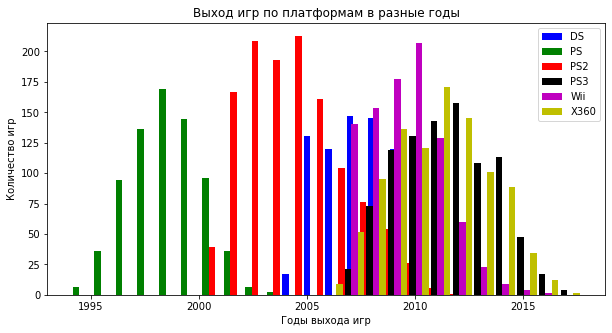

In [40]:
values1 = top6.query('platform == "ds"')
values2 = top6.query('platform == "ps"')
values3 = top6.query('platform == "ps2"')
values4 = top6.query('platform == "ps3"')
values5 = top6.query('platform == "wii"')
values6 = top6.query('platform == "x360"')
bw = 0.3
plt.figure(figsize=(10,5))
plt.bar(values1['year_of_release'], values1['total_sales'], bw, color='b')
plt.bar(values2['year_of_release']+bw, values2['total_sales'], bw, color='g')
plt.bar(values3['year_of_release']+2*bw, values3['total_sales'], bw, color='r')
plt.bar(values4['year_of_release']+3*bw, values4['total_sales'], bw, color='k')
plt.bar(values5['year_of_release']+4*bw, values5['total_sales'], bw, color='m')
plt.bar(values6['year_of_release']+5*bw, values6['total_sales'], bw, color='y')
plt.legend(['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'])
plt.xlabel('Годы выхода игр')
plt.ylabel('Количество игр')
plt.title('Выход игр по платформам в разные годы')
plt.show()

По графикам видно, что как только появляется новая платформа, начинается активный рост продаж, несколько лет продажи растут, потом постепенно падают - нормальное распределение продаж. Игры для каждой платформы популярны около 10 лет. Примерно с 2007 появляются сразу несколько конкурирующих платформ: PS3, Wii, X360. Сначала лидирует Wii, затем ее вытесняют X360 и PS3. 

#### Платформы-лидеры
Для дальнейшего исследования возьмем данные с 2014 года (для прогнозирования обычно берут 2-3 года, в нашем датасете данные по 2016 год, но 2016 год - неполный). Предыдущие годы учитывать не будем, так как нужно основываться на актуальных тенденциях.

In [41]:
act_data = data.query('year_of_release >= 2014')

In [42]:
# Осталось 1689 строк с играми для дальнейшего анализа
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [43]:
# Будем анализировать эти платформы, остальные устарели
act_data['platform'].unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

In [44]:
# сгруппируем по названию платформы и посчитаем суммарные продажи за исследуемые годы, отсортируем по убыванию
act_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps4    288.15
xone   140.36
3ds     86.68
ps3     68.18
x360    48.22
wiiu    42.98
pc      27.05
psv     22.40
wii      5.07
psp      0.36
Name: total_sales, dtype: float64

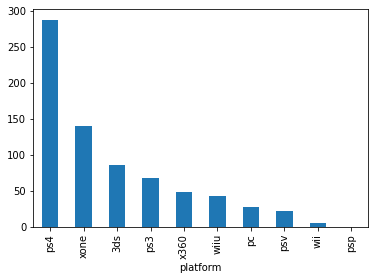

In [45]:
# и выведем на графике для наглядности
act_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)\
    .plot(kind='bar');

Лидируют по продажам платформы PS4, XOne, 3DS, PS3, X360. Платформы PSP, Wii занимают последние места, продажи их игр совсем малы.

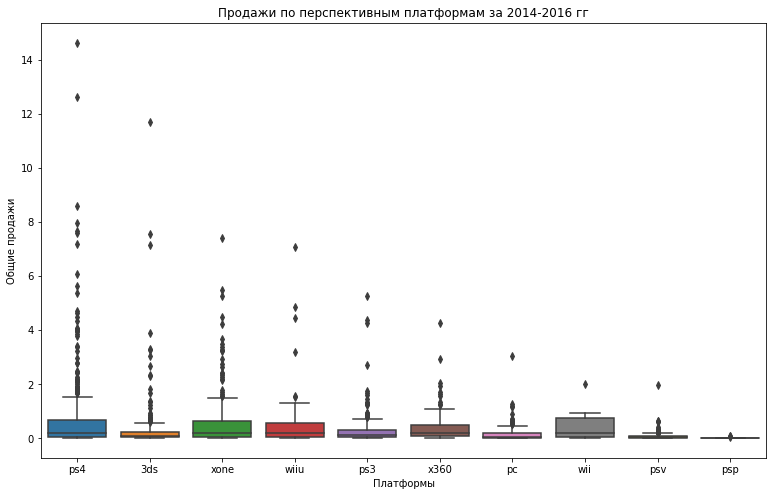

In [46]:
# построим ящики с усами с разбивкой по платформам
plt.figure(figsize=(13, 8))
(sns.boxplot(data = act_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', \
         ylabel = 'Общие продажи'))

plt.show()

По "ящикам с усами" видим:
- больше всего выбросов и 2 самые большие точечные продажи (более 12 млн) у платформы PS4 
- выбросы до 12 млн есть у платформы 3DS, хотя по общей сумме продаж она уступает XOne
- платформа XOne вторая платформа по сумме продаж, но все ее выбросы до 8 млн. 
- платформа X360 занимает пятое место по общим продажам, но крупных продаж у нее нет (максимум 4 млн) 

А теперь увеличим масштаб, чтобы был виден сам "ящик" и квартили с усами.

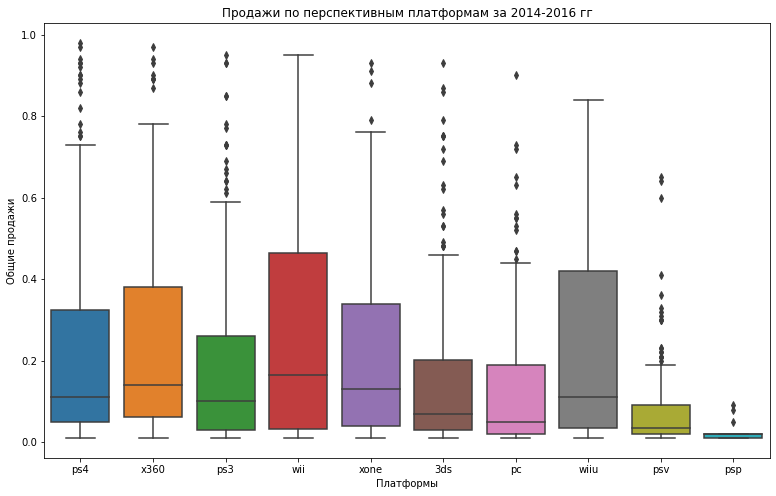

In [47]:
# платформы отсортированы по максимальному значению общих продаж
plat_act_data = act_data[act_data['total_sales'] <= 1]
plt.figure(figsize=(13, 8))
(sns.boxplot(data = plat_act_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', \
         ylabel = 'Общие продажи'))

plt.show()

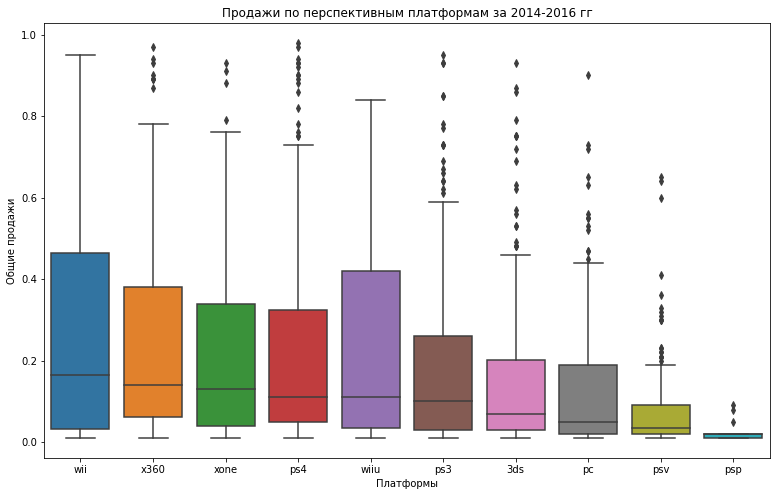

In [48]:
# плафтормы отсортированы по значению медианы по убыванию
grouped = plat_act_data.groupby('platform')
sort_median = grouped['total_sales'].median().sort_values(ascending=False)
plat_act_data = act_data[act_data['total_sales'] <= 1]
plt.figure(figsize=(13, 8))
(sns.boxplot(data = plat_act_data, y = 'total_sales', x='platform', order=sort_median.index)
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', \
         ylabel = 'Общие продажи'))

plt.show()

In [49]:
act_data[act_data['total_sales'] <= 1].groupby('platform').describe()

year_of_release                                                    \
                   count     mean  std      min      25%      50%      75%   
platform                                                                     
3ds               196.00 2,014.85 0.76 2,014.00 2,014.00 2,015.00 2,015.00   
pc                147.00 2,015.06 0.82 2,014.00 2,014.00 2,015.00 2,016.00   
ps3               206.00 2,014.71 0.76 2,014.00 2,014.00 2,015.00 2,015.00   
ps4               307.00 2,015.32 0.73 2,014.00 2,015.00 2,015.00 2,016.00   
psp                13.00 2,014.23 0.44 2,014.00 2,014.00 2,014.00 2,014.00   
psv               294.00 2,014.95 0.79 2,014.00 2,014.00 2,015.00 2,016.00   
wii                10.00 2,014.60 0.70 2,014.00 2,014.00 2,014.50 2,015.00   
wiiu               62.00 2,014.77 0.76 2,014.00 2,014.00 2,015.00 2,015.00   
x360               98.00 2,014.60 0.71 2,014.00 2,014.00 2,014.00 2,015.00   
xone              185.00 2,015.17 0.80 2,014.00 2,015.00 2,015.00 2,016.00   

                  na_sales       ... user_score      total_sales            \
              max    count mean  ...        75%  max       count mean  std   
platform                         ...                                         
3ds      2,016.00   196.00 0.03  ...       8.20 9.00      196.00 0.16 0.20   
pc       2,016.00   147.00 0.04  ...       7.60 9.30      147.00 0.14 0.18   
ps3      2,016.00   206.00 0.06  ...       7.43 8.60      206.00 0.19 0.22   
ps4      2,016.00   307.00 0.07  ...       7.80 8.70      307.00 0.22 0.24   
psp      2,015.00    13.00 0.00  ...        NaN  NaN       13.00 0.03 0.03   
psv      2,016.00   294.00 0.01  ...       8.40 9.30      294.00 0.07 0.09   
wii      2,016.00    10.00 0.11  ...       4.30 4.30       10.00 0.31 0.38   
wiiu     2,016.00    62.00 0.11  ...       7.78 8.90       62.00 0.23 0.24   
x360     2,016.00    98.00 0.15  ...       7.20 8.70       98.00 0.26 0.27   
xone     2,016.00   185.00 0.12  ...       7.60 8.90      185.00 0.22 0.23   

                                   
          min  25%  50%  75%  max  
platform                           
3ds      0.01 0.03 0.07 0.20 0.93  
pc       0.01 0.02 0.05 0.19 0.90  
ps3      0.01 0.03 0.10 0.26 0.95  
ps4      0.01 0.05 0.11 0.33 0.98  
psp      0.01 0.01 0.02 0.02 0.09  
psv      0.01 0.02 0.04 0.09 0.65  
wii      0.01 0.03 0.16 0.47 0.95  
wiiu     0.01 0.04 0.11 0.42 0.84  
x360     0.01 0.06 0.14 0.38 0.97  
xone     0.01 0.04 0.13 0.34 0.93  

[10 rows x 64 columns]

Самая высокая медиана у платформы Wii: 0,16, близки  Wiiu, XOne, X360 и PS4. И 75-й квартиль самый высокий у Wii. Эта была платформа с самыми долгими стабильными продажами, но потом ее сменила более новая Wiiu. У Wiiu были тоже долгие стабильные продажи, но уровень средних продаж намного ниже ее предшественницы.

Следующие по высоте "ящики" - это платформы XOne и X360. Их "усы" достигают почти 0.8, 75-й квартиль у X360 почти 0.4, за усами значительное кол-во выбросов. Платформу X360 успешно заменила XOne и вышла на второе место по сумме продаж.

"Ящик" платформы PS4 короче описанных выше конкурентов, но "ус" достаточно длинный, а за усом больше всего "бестселлеров" (например Call of duty: black ops 3 или Grand Theft Auto V). Эта платформа вышла на первое место по общим продажам.

#### Влияние отзывов на продажи
Возьмем самую популярную платформу по продажам - PS4 и проанализируем связь между отзывами пользователей и критиков на продажи игр.

In [50]:
# сделаем выборку игр PS4
ps4 = act_data[act_data['platform'] == 'ps4']
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.00,4.30,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.00,5.70,m,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69.00,7.50,no rating,0.01
16503,shin hayarigami 2,ps4,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61.00,7.90,t,0.01
16530,carmageddon: max damage,ps4,2016,action,0.01,0.00,0.00,0.00,51.00,5.50,m,0.01


In [51]:
# Посчитаем среднее и медианное значение оценок критиков из 100
print(ps4['critic_score'].mean())
ps4['critic_score'].median()

72.16455696202532


73.0

In [52]:
# Посчитаем среднее и медианное значение оценок пользователей из 10
print(ps4['user_score'].mean())
ps4['user_score'].median()

6.828099173553719


7.1

In [53]:
# общая сумма продаж PS4
ps4['total_sales'].sum()

288.15

In [54]:
# сумма продаж игр PS4 с отзывами критиков
act_data[(act_data['platform'] == 'ps4') & ~(act_data['critic_score']\
                                             .isna())]['total_sales'].sum()

219.42000000000002

In [55]:
# сумма продаж игр pS4 без отзывов критиков
act_data[(act_data['platform'] == 'ps4') & (act_data['critic_score']\
                                            .isna())]['total_sales'].sum()

68.73000000000002

Рассчитаем долю продаж игр без оценки критиков - 24% от всех продаж.

In [56]:
act_data[(act_data['platform'] == 'ps4') & (act_data['critic_score']\
                                            .isna())]['total_sales'].sum()\
/ ps4['total_sales'].sum() 

0.23852160333159822

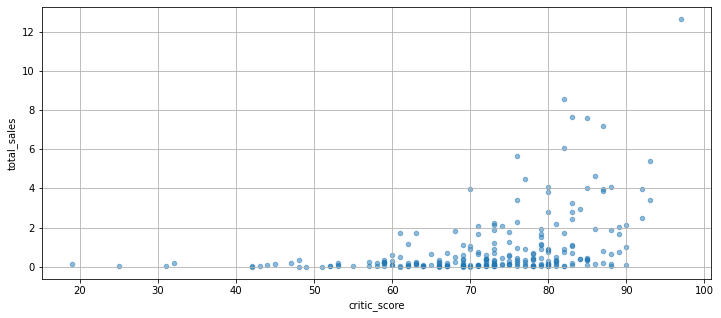

In [57]:
# построим диаграмму рассеивания, x = оценки критиков до 100, y = общее кол-во продаж
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, \
         grid=True, figsize=(12,5)); 

In [58]:
# посчитаем корреляцию между отзывами и продажами
ps4['critic_score'].corr(ps4['total_sales'])

0.40266141068104083

Чем выше оценка критиков, тем больше продаж игры. Коэффициент корреляции Пирсона положительный 0.4, зависимость продаж игр от оценки критиков прослеживается. Но есть достаточное количество игр с рейтингом критиков 60-80 из 100 и высоким количеством продаж. Также есть высоко оцененные игры, но с малым количеством продаж. И есть игра-бестселлер с самым высоким рейтингом и самым большим числом продаж. В рамках данного проекта мы не можем оценить причины низких продаж при высоком рейтинге и высоких продаж при низком рейтинге из-за ограниченности данных.

Повторим действия для оценок пользователей.

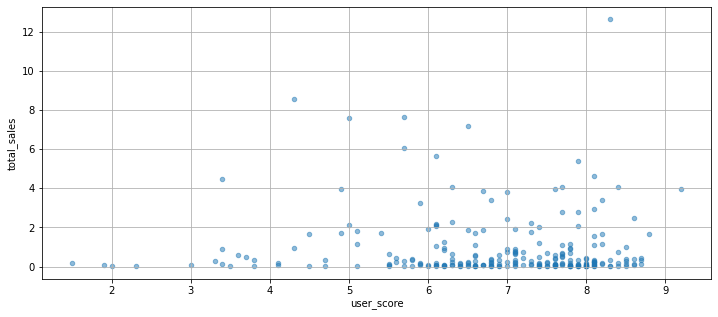

In [59]:
# построим диаграмму рассеивания, x = оценки пользователей до 10, y = общее кол-во продаж
ps4.plot(x='user_score', y='total_sales', kind='scatter', \
         alpha=0.5, grid=True, figsize=(12,5)); 

In [60]:
# посчитаем корреляцию между отзывами и продажами
ps4['user_score'].corr(ps4['total_sales'])

-0.040131589472697356

Коэффициент Пирсона отрицательный: -0.04. Зависимость между отзывами пользователей и продажей игр близка к нулю. Есть игры с очень низкой оценкой, но с очень высокими продажами. Есть высоко оцененные игры, но с минимальными продажами. Оценка пользователей не всегда объективная: одному игра понравилась во всем, а другому абсолютно не понравилась. Также бывает, что конкуренты специально занижают рейтинг игры.

Возьмем данные о второй по популярности платформе XOne и рассчитаем корреляцию между отзывами пользоватеелй и критиков на количество продаж.

In [61]:
xone = act_data[act_data['platform'] == 'xone']
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.00,7.90,m,5.47
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.00,5.40,m,5.26
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.00,6.40,t,4.49
270,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.00,6.20,m,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,sébastien loeb rally evo,xone,2016,racing,0.00,0.01,0.00,0.00,63.00,8.20,e,0.01
16643,rugby challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,NaN,6.60,e,0.01
16645,zombiu,xone,2016,action,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16660,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.00,6.70,no rating,0.01


In [62]:
# корреляция отзывов критиков и продаж игр
print(xone['critic_score'].corr(xone['total_sales']))
# корреляция отзывов пользователей и продаж игр
xone['user_score'].corr(xone['total_sales'])

0.42867694370333226


-0.0703839280647581

Ситуация аналогичная, как и у платформы-лидера PS4. И проверим платформу Nintendo 3DS.

In [63]:
ds = act_data[act_data['platform'] == '3ds']
ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
96,super smash bros. for wii u and 3ds,3ds,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,no rating,7.55
108,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,no rating,7.14
312,monster hunter 4 ultimate,3ds,2014,role-playing,0.68,0.48,2.62,0.11,86.00,8.70,t,3.89
406,monster hunter x,3ds,2015,action,0.27,0.21,2.79,0.05,NaN,NaN,no rating,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16599,legends of oz: dorothy's return,3ds,2014,puzzle,0.00,0.01,0.00,0.00,NaN,NaN,e,0.01
16608,mario & luigi: paper jam & mario kart 7 double...,3ds,2015,misc,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16610,kiniro no corda 3,3ds,2015,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16668,fujiko f. fujio characters: great assembly! sl...,3ds,2014,action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01


In [64]:
# корреляция отзывов критиков и продаж игр
print(ds['critic_score'].corr(ds['total_sales']))
# корреляция отзывов пользователей и продаж игр
ds['user_score'].corr(ds['total_sales'])

0.314117492869051


0.2151932718527028

Оценки критиков еще меньше влияют на продажу игр, чем у других приставок. А коэффициент Пирсона взаимосвязи оценки пользователей на продажи значительно выше, чем у PS4 и XOne. Скорее всего это связано с менталитетом японцев, так как большая часть игр продана именно в Японии.

#### Жанры игр
Для начала посмотрим все существующие жанры.

In [65]:
act_data['genre'].unique()

array(['shooter', 'action', 'role-playing', 'sports', 'fighting',
       'racing', 'misc', 'platform', 'simulation', 'adventure', 'puzzle',
       'strategy'], dtype=object)

In [66]:
act_data['genre'].value_counts()

action          619
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: genre, dtype: int64

Самые популярные жанры игр: Action, Role-Playing, Adventure, Sports, Shooter. Меньше всего выпускали игр в жанрах Puzzle, Strategy и Platform.

In [67]:
# сгруппируем игры по жанрам и найдем суммарное кол-во продаж, отсортируем по убыванию
act_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
action         199.36
shooter        170.94
sports         109.48
role-playing   101.44
misc            37.55
fighting        28.22
racing          27.52
platform        18.09
adventure       17.55
simulation      13.13
strategy         3.96
puzzle           2.21
Name: total_sales, dtype: float64

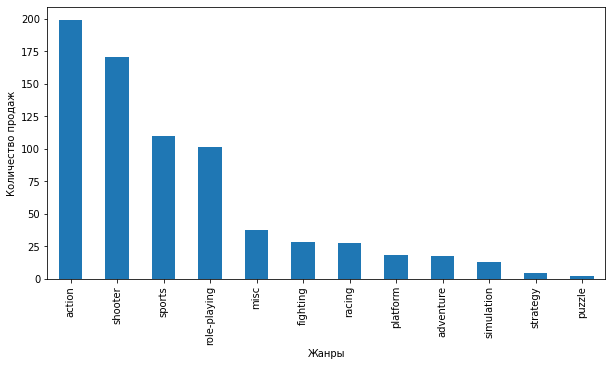

In [68]:
# диаграмма для наглядности
act_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,5))
plt.xlabel('Жанры')
plt.ylabel('Количество продаж');

Лидер по продажам тот же, самый продаваемый жанр - Action, затем - Shooter, самый менее продаваемый жанр - Puzzle. 

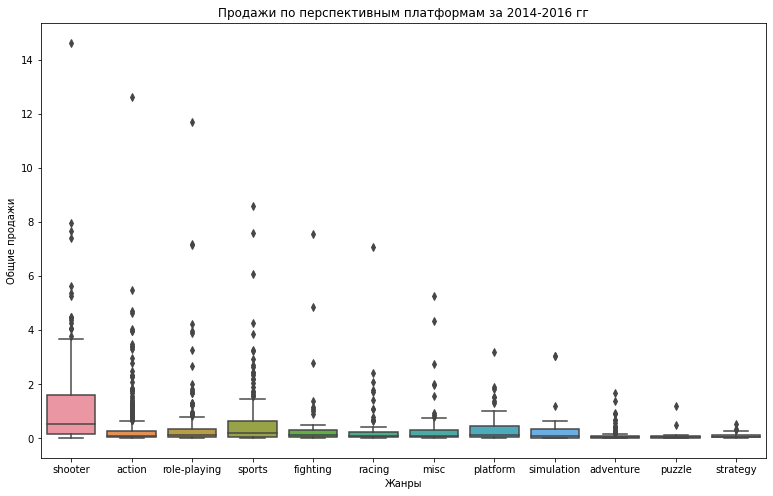

In [69]:
# построим ящики с усами с разбивкой по жанрам
plt.figure(figsize=(13, 8))
(sns.boxplot(data = act_data, y = 'total_sales', x='genre')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Жанры', \
         ylabel = 'Общие продажи'))

plt.show()

А теперь увеличим масштаб, чтобы был виден сам "ящик" и квартили с усами.

In [70]:
genre_act_data = act_data[act_data['total_sales'] <= 3]

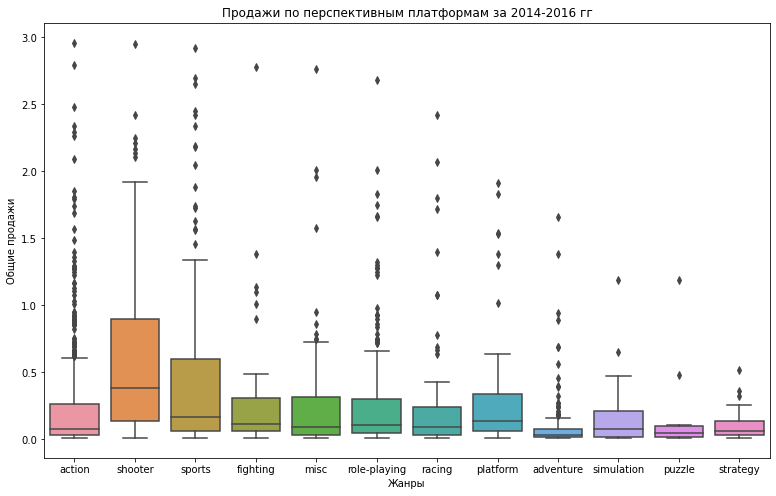

In [71]:
# жанры отсортированы по максимальному значению общих продаж
plt.figure(figsize=(13, 8))
(sns.boxplot(data = genre_act_data, y = 'total_sales', x='genre')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Жанры', \
         ylabel = 'Общие продажи'))

plt.show()

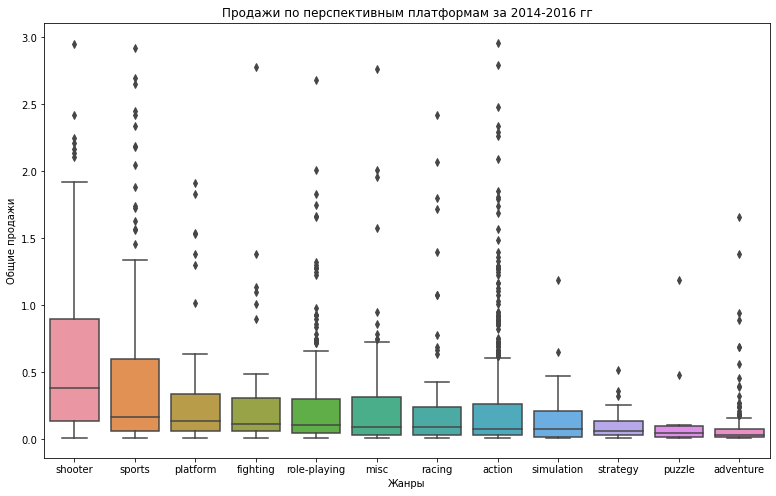

In [72]:
# жанры отсортированы по значению медианы по убыванию
grouped = genre_act_data.groupby('genre')
sorted_median = grouped['total_sales'].median().sort_values(ascending=False)
plt.figure(figsize=(13, 8))
(sns.boxplot(data = genre_act_data, y = 'total_sales', x='genre', order=sorted_median.index)
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Жанры', \
         ylabel = 'Общие продажи'))

plt.show()

In [73]:
act_data[act_data['total_sales'] <= 3].groupby('genre').describe()

year_of_release                                           \
                       count     mean  std      min      25%      50%   
genre                                                                   
action                608.00 2,014.99 0.77 2,014.00 2,014.00 2,015.00   
adventure             185.00 2,014.90 0.84 2,014.00 2,014.00 2,015.00   
fighting               58.00 2,014.91 0.80 2,014.00 2,014.00 2,015.00   
misc                  111.00 2,014.93 0.81 2,014.00 2,014.00 2,015.00   
platform               37.00 2,015.14 0.82 2,014.00 2,014.00 2,015.00   
puzzle                 14.00 2,014.57 0.65 2,014.00 2,014.00 2,014.50   
racing                 68.00 2,014.97 0.86 2,014.00 2,014.00 2,015.00   
role-playing          214.00 2,014.85 0.79 2,014.00 2,014.00 2,015.00   
shooter               109.00 2,015.04 0.87 2,014.00 2,014.00 2,015.00   
simulation             42.00 2,015.19 0.80 2,014.00 2,015.00 2,015.00   
sports                154.00 2,014.97 0.80 2,014.00 2,014.00 2,015.00   
strategy               37.00 2,015.14 0.75 2,014.00 2,015.00 2,015.00   

                               na_sales       ... user_score      total_sales  \
                  75%      max    count mean  ...        75%  max       count   
genre                                         ...                               
action       2,016.00 2,016.00   608.00 0.09  ...       7.70 9.00      608.00   
adventure    2,016.00 2,016.00   185.00 0.03  ...       8.40 9.30      185.00   
fighting     2,016.00 2,016.00    58.00 0.11  ...       7.80 8.70       58.00   
misc         2,016.00 2,016.00   111.00 0.10  ...       8.00 8.70      111.00   
platform     2,016.00 2,016.00    37.00 0.15  ...       8.22 8.90       37.00   
puzzle       2,015.00 2,016.00    14.00 0.05  ...       8.45 8.60       14.00   
racing       2,016.00 2,016.00    68.00 0.08  ...       7.47 8.70       68.00   
role-playing 2,015.00 2,016.00   214.00 0.09  ...       8.10 9.30      214.00   
shooter      2,016.00 2,016.00   109.00 0.30  ...       7.70 8.50      109.00   
simulation   2,016.00 2,016.00    42.00 0.03  ...       7.38 8.90       42.00   
sports       2,016.00 2,016.00   154.00 0.24  ...       6.72 8.80      154.00   
strategy     2,016.00 2,016.00    37.00 0.03  ...       7.92 8.30       37.00   

                                                 
             mean  std  min  25%  50%  75%  max  
genre                                            
action       0.24 0.40 0.01 0.03 0.08 0.26 2.96  
adventure    0.09 0.20 0.01 0.02 0.03 0.08 1.66  
fighting     0.27 0.45 0.01 0.06 0.11 0.31 2.78  
misc         0.25 0.42 0.01 0.03 0.09 0.32 2.76  
platform     0.40 0.57 0.01 0.06 0.14 0.34 1.91  
puzzle       0.16 0.32 0.01 0.02 0.04 0.10 1.19  
racing       0.30 0.51 0.01 0.03 0.09 0.24 2.42  
role-playing 0.28 0.41 0.01 0.05 0.11 0.30 2.68  
shooter      0.64 0.67 0.01 0.14 0.38 0.90 2.95  
simulation   0.17 0.23 0.01 0.02 0.08 0.21 1.19  
sports       0.47 0.64 0.01 0.06 0.17 0.60 2.92  
strategy     0.11 0.12 0.01 0.03 0.06 0.14 0.52  

[12 rows x 64 columns]

На графиках и по таблице видно:
- Игр в стиле Puzzle выпускается очень мало, основная часть игр была продана до 2014 года, есть всего 2 выброса,  максимальная продажа игры - 1.19 млн.
- Самый широкий "ящик" и самая высокая медиана у жанра Shooter, также именно в этом жанре игра была продана больше всего раз - более 14 млн. Игры в стиле "стрелялок" нравятся многим геймерам, их продажи высоки и стабильны долгое время.
- Следующий стабильный жанр - Sports. После длинного "уса" большое количество выбросов плюс несколько единичных бестселлеров до 9 млн. продаж.
- Игры в стиле Action имеют узкий ящик и очень короткий "ус", но имеют слишком много кучных выбросов после уса и одну игру с 12 млн. продаж. За счет огромного количества прибыльных выбросов этот жанр на первом месте по суммарной продаваемости игр.

#### Вывод
1. Среди всех платформ есть лидеры по продажам и по выпущенным играм: PS2, DS, PS3, Wii, X360, PSP, PS.
2. Игры на одной платформе популярны примерно 10 лет. С 2007 года появляются конкурирующие платформы, выпуск игр увеличивается.
3. За последние 2,5 года (анализируемые данные) платформы-лидеры по продажам: PS4, XOne, 3DS, PS3, X360.
4. Платформа Wii была с самыми долгими стабильными высокими продажами, затем ее сменила Wiiu. 
5. Зависимость между оценками пользователей/критиков и продажами небольшая. Есть игры со средней оценкой, но с высокими продажами. Есть высоко оцененные игры, но с минимальными продажами.
6. Самые популярные жанры игр: Action, Role-Playing, Adventure, Sports, Shooter. Меньше всего выпускали игр в жанрах Puzzle, Strategy и Platform. Самый продаваемый жанр - Action.
7. Игры в стиле "стрелялок" нравятся многим геймерам, их продажи самые высокие и стабильные в течение долгого времени.

### Портрет пользователя региона
В нашем датасете есть данные по продажам в 4-х регионах: Северная Америка (NA), Европа (EU), Япония (JP) и другие страны (other). В данном проекте опишем портрет пользователей игр для трех регионов: NA, EU, JP.

#### Популярные жанры
Определим самые популярные жанры в разных регионах.

In [74]:
# сгруппируем игры по жанрам и по общей сумме продаж в каждом регионе
genre_reg = act_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'],\
                                 aggfunc='sum')
genre_reg

,eu_sales,jp_sales,na_sales
genre,,,
action,74.68,29.58,72.53
adventure,6.49,3.60,5.64
fighting,6.69,6.37,12.43
misc,12.86,5.61,15.05
platform,6.80,2.69,6.79
puzzle,0.52,0.93,0.65
racing,14.13,1.76,8.74
role-playing,28.17,31.16,33.47
shooter,65.52,4.87,79.02


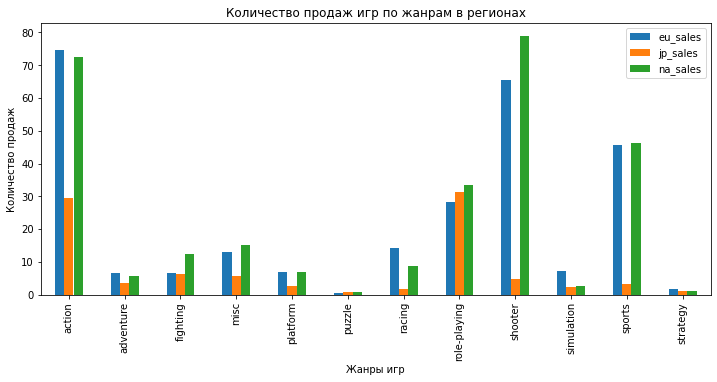

In [75]:
# построим график для наглядности
genre_reg.plot(kind='bar', figsize=(12,5))
plt.xlabel('Жанры игр')
plt.ylabel('Количество продаж')
plt.title('Количество продаж игр по жанрам в регионах');

Теперь выделим в каждом регионе топ-5 жанров, остальные жанры объединим в одну категорию other. Добавим новые столбцы для каждого региона.

In [76]:
# NA регион
act_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
shooter        79.02
action         72.53
sports         46.13
role-playing   33.47
misc           15.05
fighting       12.43
racing          8.74
platform        6.79
adventure       5.64
simulation      2.63
strategy        0.98
puzzle          0.65
Name: na_sales, dtype: float64

In [77]:
# создадим функцию, которая для жанров не топ-5 NA присваивает категорию other в отдельном столбце
def top_genre_na(row):
        if 'shooter' in row:
            return 'shooter'
        elif 'action' in row:
            return 'action'
        elif 'sports' in row:
            return 'sports'
        elif 'role-playing' in row:
            return 'role-playing'
        elif 'misc' in row:
            return 'misc'
        else:
            return 'other'

# Создадим столбец с жанром для топ-5 и других, применив функцию   
act_data['top5_na'] = act_data['genre'].apply(top_genre_na)

# Проверим столбец
#act_data['top5_na'].head(20)

/var/folders/d6/grrmgpcj0rl9170z0dgjjhc80000gn/T/ipykernel_43100/231359992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data['top5_na'] = act_data['genre'].apply(top_genre_na)


In [78]:
# EU регион
act_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
action         74.68
shooter        65.52
sports         45.73
role-playing   28.17
racing         14.13
misc           12.86
simulation      7.30
platform        6.80
fighting        6.69
adventure       6.49
strategy        1.79
puzzle          0.52
Name: eu_sales, dtype: float64

In [79]:
# создадим функцию, которая для жанров не топ-5 EU присваивает категорию other в отдельном столбце
def top_genre_eu(row):
        if 'shooter' in row:
            return 'shooter'
        elif 'action' in row:
            return 'action'
        elif 'sports' in row:
            return 'sports'
        elif 'role-playing' in row:
            return 'role-playing'
        elif 'racing' in row:
            return 'racing'
        else:
            return 'other'

# Создадим столбец с жанром для топ-5 и других, применив функцию   
act_data['top5_eu'] = act_data['genre'].apply(top_genre_eu)

# Проверим столбец
#act_data['top5_eu'].head(20)

/var/folders/d6/grrmgpcj0rl9170z0dgjjhc80000gn/T/ipykernel_43100/3817011439.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data['top5_eu'] = act_data['genre'].apply(top_genre_eu)


In [80]:
# JP регион
act_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
role-playing   31.16
action         29.58
fighting        6.37
misc            5.61
shooter         4.87
adventure       3.60
sports          3.26
platform        2.69
simulation      2.31
racing          1.76
strategy        0.95
puzzle          0.93
Name: jp_sales, dtype: float64

In [81]:
# создадим функцию, которая для жанров не топ-5 JP присваивает категорию other в отдельном столбце
def top_genre_jp(row):
        if 'shooter' in row:
            return 'shooter'
        elif 'action' in row:
            return 'action'
        elif 'fighting' in row:
            return 'fighting'
        elif 'role-playing' in row:
            return 'role-playing'
        elif 'misc' in row:
            return 'misc'
        else:
            return 'other'

# Создадим столбец с жанром для топ-5 и других, применив функцию   
act_data['top5_jp'] = act_data['genre'].apply(top_genre_jp)

# Проверим столбец
#act_data['top5_jp'].head(20)

/var/folders/d6/grrmgpcj0rl9170z0dgjjhc80000gn/T/ipykernel_43100/2713583582.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data['top5_jp'] = act_data['genre'].apply(top_genre_jp)


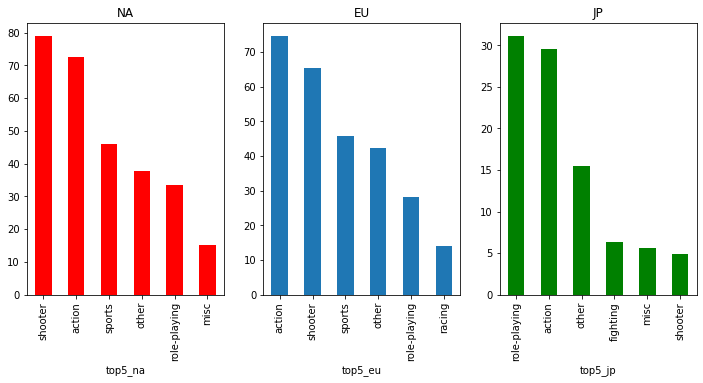

In [82]:
# строим 3 графика для наглядности
axes = plt.subplots(figsize=(12,5))
#не сообразила, как добавить общий заголовок для всех трех графиков
#plt.title('Продажи игр по топ-5 жанрам в разных регионах')
#axes.set_title('Продажи игр по топ-5 жанрам в разных регионах')

plt.subplot(1, 3, 1)
act_data.groupby('top5_na')['na_sales'].sum().sort_values(ascending=False)\
    .plot(kind='bar', color='r')
plt.title('NA')

plt.subplot(1, 3, 2)
act_data.groupby('top5_eu')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('EU')

plt.subplot(1, 3, 3)
act_data.groupby('top5_jp')['jp_sales'].sum().sort_values(ascending=False)\
    .plot(kind='bar', color='g')
plt.title('JP');

Топ-5 жанров:
- в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc 
- в Европе: Action, Shooter, Sports, Role-Playing, Racing
- в Японии: Role-Playing, Action, Fighting, Misc, Shooter

В NA больше всего любят Shooter, в EU - Action, в JP - Role-Playing.

In [83]:
# посчитаем долю продаж игр Shooter в NA относительно всех продаж игр Shooter
genre_reg['na_sales'].values[8] / (genre_reg['na_sales'].values[8] + genre_reg['eu_sales'].values[8] + genre_reg['jp_sales'].values[8])

0.5288802623653035

Больше половины игр жанра Shooter было продано в NA. С увеличением популярности фильмов в стиле "стрелялок" и культом "супергероев" стали популярны и видеоигры в этом стиле. Обычно в игре много врагов, хорошие спецэффекты, куча разного оружия. Диалоги в игре уходят на второй план, главное - победить всех врагов.

In [84]:
# посчитаем долю продаж игр Role-Playing в JP относительно всех продаж игр Role-Playing
genre_reg['jp_sales'].values[7] / (genre_reg['na_sales'].values[7] + genre_reg['eu_sales'].values[7] + genre_reg['jp_sales'].values[7])

0.33577586206896554

In [85]:
# посчитаем долю продаж игр Role-Playing в JP относительно всех продаж в JP
genre_reg['jp_sales'].values[7] / sum(genre_reg['jp_sales'])

0.33472983134600925

Больше трети всех игр жанра Role-Playing было продано в Японии, это самый популярный жанр в Японии среди всех игр - 30%. Японцы больше любят "квестовые" игры со сложным развивающимся сюжетом и с возможностью создавать и "прокачивать" своих персонажей, чтобы в игре можно было развивать разные способности и навыки, взаимодействовать с другими персонажами.

#### Популярные платформы
Определим самые популярные платформы в разных регионах.

In [86]:
# сгруппируем игры по платформам и по общей сумме продаж в каждом регионе
plat_reg = act_data.pivot_table(index='platform', \
                                values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
plat_reg

,eu_sales,jp_sales,na_sales
platform,,,
3ds,16.12,44.24,22.64
pc,17.97,0.00,7.23
ps3,25.54,11.22,22.05
ps4,130.04,15.02,98.61
psp,0.00,0.36,0.00
psv,3.53,14.54,2.52
wii,2.59,0.00,2.08
wiiu,13.15,7.31,19.36
x360,15.49,0.08,28.30


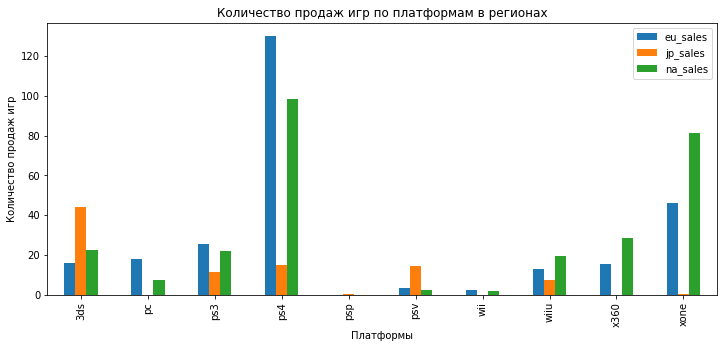

In [87]:
plat_reg.plot(kind='bar', figsize=(12,5))
plt.xlabel('Платформы')
plt.ylabel('Количество продаж игр')
plt.title('Количество продаж игр по платформам в регионах');

Теперь выделим в каждом регионе топ-5 платформ, остальные платформы объединим в одну категорию other. Добавим новые столбцы для каждого региона.

In [88]:
# NA регион
act_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
ps4    98.61
xone   81.27
x360   28.30
3ds    22.64
ps3    22.05
wiiu   19.36
pc      7.23
psv     2.52
wii     2.08
psp     0.00
Name: na_sales, dtype: float64

In [89]:
# создадим функцию, которая для платформ не топ-5 NA присваивает категорию other в отдельном столбце
def top_plat_na(row):
        if 'ps4' in row:
            return 'ps4'
        elif 'xone' in row:
            return 'xone'
        elif 'x360' in row:
            return 'x360'
        elif '3ds' in row:
            return '3ds'
        elif 'ps3' in row:
            return 'ps3'
        else:
            return 'other'

# Создадим столбец с платформой для топ-5 и других, применив функцию   
act_data['plat5_na'] = act_data['platform'].apply(top_plat_na)

# Проверим столбец
#act_data['plat5_na'].head(10)

/var/folders/d6/grrmgpcj0rl9170z0dgjjhc80000gn/T/ipykernel_43100/1571228164.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data['plat5_na'] = act_data['platform'].apply(top_plat_na)


In [90]:
# EU регион
act_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
ps4    130.04
xone    46.25
ps3     25.54
pc      17.97
3ds     16.12
x360    15.49
wiiu    13.15
psv      3.53
wii      2.59
psp      0.00
Name: eu_sales, dtype: float64

In [91]:
# создадим функцию, которая для платформ не топ-5 EU присваивает категорию other в отдельном столбце
def top_plat_eu(row):
        if 'ps4' in row:
            return 'ps4'
        elif 'xone' in row:
            return 'xone'
        elif 'pc' in row:
            return 'pc'
        elif '3ds' in row:
            return '3ds'
        elif 'ps3' in row:
            return 'ps3'
        else:
            return 'other'

# Создадим столбец с платформой для топ-5 и других, применив функцию   
act_data['plat5_eu'] = act_data['platform'].apply(top_plat_eu)

# Проверим столбец
#act_data['plat5_eu'].head(10)

/var/folders/d6/grrmgpcj0rl9170z0dgjjhc80000gn/T/ipykernel_43100/4270696720.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data['plat5_eu'] = act_data['platform'].apply(top_plat_eu)


In [92]:
# JP регион
act_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3ds    44.24
ps4    15.02
psv    14.54
ps3    11.22
wiiu    7.31
psp     0.36
xone    0.32
x360    0.08
pc      0.00
wii     0.00
Name: jp_sales, dtype: float64

In [93]:
# создадим функцию, которая для платформ не топ-5 JP присваивает категорию other в отдельном столбце
def top_plat_jp(row):
        if 'ps4' in row:
            return 'ps4'
        elif 'psv' in row:
            return 'psv'
        elif 'wiiu' in row:
            return 'wiiu'
        elif '3ds' in row:
            return '3ds'
        elif 'ps3' in row:
            return 'ps3'
        else:
            return 'other'

# Создадим столбец с платформой для топ-5 и других, применив функцию   
act_data['plat5_jp'] = act_data['platform'].apply(top_plat_jp)

# Проверим столбец
#act_data['plat5_jp'].head(10)

/var/folders/d6/grrmgpcj0rl9170z0dgjjhc80000gn/T/ipykernel_43100/1766222222.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data['plat5_jp'] = act_data['platform'].apply(top_plat_jp)


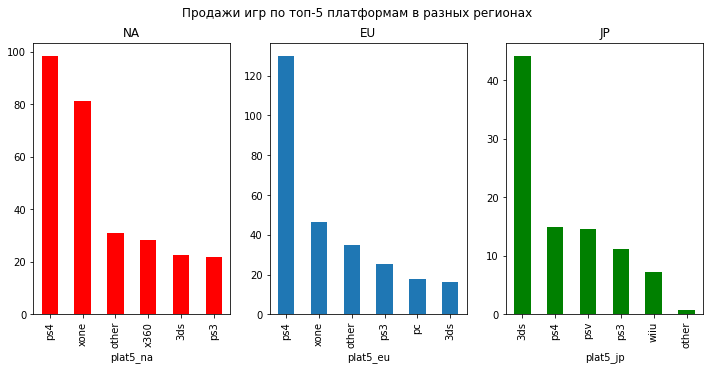

In [94]:
# строим 3 графика для наглядности
axes = plt.subplots(figsize=(12,5))
#не сообразила, как добавить общий заголовок для всех трех графиков
#plt.title('Продажи игр по топ-5 платформам в разных регионах')
#axes.set_title('Продажи игр по топ-5 платформам в разных регионах')

plt.suptitle('Продажи игр по топ-5 платформам в разных регионах')

plt.subplot(1, 3, 1)
act_data.groupby('plat5_na')['na_sales'].sum().sort_values(ascending=False)\
    .plot(kind='bar', color='r')
plt.title('NA')

plt.subplot(1, 3, 2)
act_data.groupby('plat5_eu')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('EU')

plt.subplot(1, 3, 3)
act_data.groupby('plat5_jp')['jp_sales'].sum().sort_values(ascending=False)\
    .plot(kind='bar', color='g')
plt.title('JP');

Топ-5 платформ в разных регионах:
- в NA: PS4, XOne, X360, 3DS, PS3 
- в EU: PS4, XOne, PS3, PC, 3DS
- в JP: 3DS, PS4, PSV, PS3, Wiiu 

Самой популярной платформой в NA и в EU является PS4 компании Sony, а в Японии она на втором месте после 3DS компании Nintendo. В NA и в EU 3DS всего лишь на 4-м и 5-м месте по популярности. Также в NA и в EU популярна XOne, а в Японии игры на этих платформах совсем непопулярны.

In [95]:
# посчитаем долю продаж игр на платформе PS4 в NA относительно всех регионов
plat_reg['na_sales'].values[3] / (plat_reg['na_sales'].values[3] + \
                                  plat_reg['eu_sales'].values[3] + \
                                  plat_reg['jp_sales'].values[3])

0.4046866663930726

In [96]:
# посчитаем долю продаж игр на платформе PS4 в EU относительно всех регионов
plat_reg['eu_sales'].values[3] / (plat_reg['na_sales'].values[3] + \
                                  plat_reg['eu_sales'].values[3] + \
                                  plat_reg['jp_sales'].values[3])

0.5336725899782493

In [97]:
# посчитаем долю продаж игр на платформе PS4 в JP относительно всех регионов
plat_reg['jp_sales'].values[3] / (plat_reg['na_sales'].values[3] + \
                                  plat_reg['eu_sales'].values[3] + \
                                  plat_reg['jp_sales'].values[3])

0.06164074362867813

53% всех игр на платформе PS4 продано в Европе, 40% в Северной Америке и только 6% в Японии.

In [98]:
# посчитаем долю продаж игр на платформе 3DS в JP относительно всех продаж в JP
plat_reg['jp_sales'].values[0] / sum(plat_reg['jp_sales'])

0.4752390160060157

Самая популярная платформа в Японии 3DS занимает 47% продаж от всех других платформ.

In [99]:
# посчитаем долю продаж игр на платформе XOne в NA относительно всех регионов
plat_reg['na_sales'].values[9] / (plat_reg['na_sales'].values[9] + \
                                  plat_reg['eu_sales'].values[9] + \
                                  plat_reg['jp_sales'].values[9])

0.6357165206508135

In [100]:
# посчитаем долю продаж игр на платформе XOne в EU относительно всех регионов
plat_reg['eu_sales'].values[9] / (plat_reg['na_sales'].values[9] + plat_reg['eu_sales']\
                                  .values[9] + plat_reg['jp_sales'].values[9])

0.36178035043804757

In [101]:
# посчитаем долю продаж игр на платформе XOne в JP относительно всех регионов
plat_reg['jp_sales'].values[9] / (plat_reg['na_sales'].values[9] + plat_reg['eu_sales']\
                                  .values[9] + plat_reg['jp_sales'].values[9])

0.0025031289111389237

63% продаж всех игр на платформе XOne приходится на Северную Америку, 36% на Европу и 0,2% на Японию.

#### Рейтинг ESRB 
Рассмотрим все типы рейтинга ESRB

In [102]:
act_data['rating'].unique()

array(['no rating', 'm', 'e', 't', 'e10+'], dtype=object)

Расшифровка:
- E - для всех возрастов
- M - материалы игры не подходят для подростков младше 17 лет
- T - игра подходит для лиц от 13 лет
- E10+ - для всех от 10 лет и старше
- no rating - рейтинг не присвоен или ожидается

In [103]:
act_data['rating'].value_counts()

no rating    749
t            271
m            265
e            219
e10+         185
Name: rating, dtype: int64

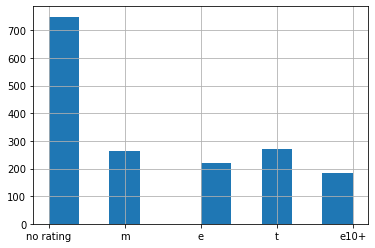

In [104]:
# график для наглядности
act_data['rating'].hist();

Больше всего игр без рейтинга (мы сами присвоили играм этот рейтинг, так как было много пропущенных значений, не обращаем внимание на это значение). 
Среди игр с рейтингом почти одинаковое количество игр для подростков (13+) и для взрослых (17+). Меньше всех игр для детей от 10+.

In [105]:
# посчитаем сумму продаж игр с разным рейтингом
act_data.groupby('rating')['total_sales'].sum().sort_values(ascending=False)

rating
m           226.54
no rating   198.97
e           133.13
t            99.13
e10+         71.68
Name: total_sales, dtype: float64

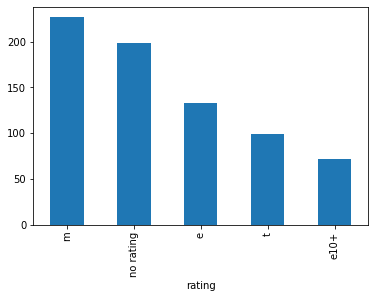

In [106]:
# график для наглядности
act_data.groupby('rating')['total_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar');

Больше всего продаж игр для взрослых (17+), на втором месте - игры без рейтинга, затем игры для всех возрастов.

In [107]:
# выберем все игры без рейтинга
no_rating = act_data[act_data['rating'] == 'no rating']
no_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,top5_na,top5_eu,top5_jp,plat5_na,plat5_eu,plat5_jp
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63,shooter,shooter,shooter,ps4,ps4,ps4
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68,role-playing,role-playing,role-playing,3ds,3ds,3ds
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98,shooter,shooter,shooter,ps4,ps4,ps4
96,super smash bros. for wii u and 3ds,3ds,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,no rating,7.55,other,other,fighting,3ds,3ds,3ds
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39,shooter,shooter,shooter,xone,xone,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,other,other,other,other,other,psv
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,misc,other,misc,other,other,psv
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,action,action,action,ps3,ps3,ps3
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,other,other,other,other,other,psv


In [108]:
# доля продаж игр с рейтингом и без (no rating) в NA
no_rating['na_sales'].sum() / act_data['na_sales'].sum()

0.22783918890375268

In [109]:
# доля продаж игр с рейтингом и без в EU
no_rating['eu_sales'].sum() / act_data['eu_sales'].sum()

0.2177848381853111

In [110]:
# доля продаж игр с рейтингом и без в JP
no_rating['jp_sales'].sum() / act_data['jp_sales'].sum()

0.6112364378558384

In [111]:
# доля игр без рейтинга ко всем играм
no_rating.shape[0] / act_data.shape[0]

0.443457667258733

Рейтинг ESRB присвоен чуть больше половине всех игр (56%). В NA и в EU доля купленных игр с рейтингом составляет 78% и 79% соответственно. В Японии только 39% проданных игр имеют рейтинг ESRB.

In [112]:
# суммы проданных игр с рейтином в NA
act_data.groupby('rating')['na_sales'].sum()

rating
e           50.74
e10+        33.23
m           96.42
no rating   64.72
t           38.95
Name: na_sales, dtype: float64

In [113]:
# суммы проданных игр с рейтином в EU
act_data.groupby('rating')['eu_sales'].sum()

rating
e           58.06
e10+        26.16
m           93.44
no rating   58.95
t           34.07
Name: eu_sales, dtype: float64

In [114]:
# суммы проданных игр с рейтином в JP
act_data.groupby('rating')['jp_sales'].sum()

rating
e            8.94
e10+         4.46
m            8.01
no rating   56.90
t           14.78
Name: jp_sales, dtype: float64

In [115]:
# сгруппируем игры по рейтингу и по общей сумме продаж в каждом регионе
rat_reg = act_data.pivot_table(index='rating', \
                               values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
rat_reg

,eu_sales,jp_sales,na_sales
rating,,,
e,58.06,8.94,50.74
e10+,26.16,4.46,33.23
m,93.44,8.01,96.42
no rating,58.95,56.90,64.72
t,34.07,14.78,38.95


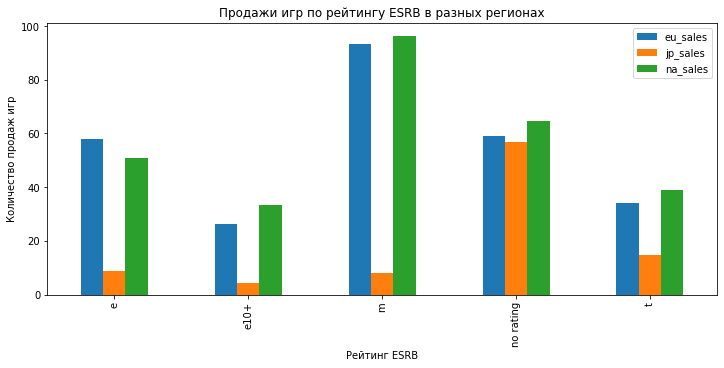

In [116]:
# для наглядности
rat_reg.plot(kind='bar', figsize=(12,5))
plt.title('Продажи игр по рейтингу ESRB в разных регионах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж игр');

Среди проданных игр с рейтингом в NA и в EU лидируют игры для взрослых (17+), в JP - для подростков (13+).

#### Вывод
В разных регионах игры продаются по-разному:
1. В NA больше всего любят Shooter, в EU - Action, в JP - Role-Playing.
2. Больше половины игр жанра Shooter было продано в NA. Больше трети всех игр жанра Role-Playing было продано в Японии, это самый популярный жанр в Японии среди всех игр - 30%.
3. В разных регионах популярны разные платформы. Самой популярной платформой в NA и в EU является PS4 компании Sony, а в Японии - 3DS компании Nintendo. Также в NA и в EU популярна XOne, а в Японии игры на этих платформах совсем непопулярны.
4. Рейтинг ESRB присвоен чуть больше половине всех игр (56%). В NA и в EU доля купленных игр с рейтингом составляет 78% и 79% соответственно. В Японии только 39% проданных игр имеют рейтинг ESRB.
5. В NA и в EU больше всего продаж игр для взрослых (17+), в JP - игры для подростков (13+). 

### Проверка гипотез
#### Пользовательские рейтинги платформ
Проверим, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

- Нулевая гипотеза H0: cредние пользовательские рейтинги платформ Xbox One и PC равны.
- Альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC неравны.

Это две разные генеральные совокупности, они не зависят друг от друга. Значения дисперсий могут быть разные, так как сами выборки разного размера, пользователи, которые оставляли оценку играм, могут проживать в разных регионах и иметь разный менталитет. Проверим гипотезу с помощью t-test'a (критерия Стьюдента).

In [130]:
data[data['platform'] == 'xone']['year_of_release'].unique()

array([2015, 2014, 2013, 2016])

In [131]:
data[data['platform'] == 'pc']['year_of_release'].unique()

array([2009, 2004, 2012, 1996, 2010, 1995, 1997, 2007, 2011, 2002, 1994,
       2014, 2000, 2001, 1992, 1998, 1999, 2003, 2013, 2008, 2015, 2005,
       2016, 2006, 1985, 1988])

Игры на этих платформах выпускались в разные годы. Для сравнения нужно выбрать одинаковый период, возьмем все игры с 2013 по 2016 (годы выпуска игр XOne).

In [132]:
# выборка игр на XOne с пользовательским рейтингом
xbox = data[(data['platform'] == 'xone') & ~(data['user_score'].isna())]
xbox

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.00,7.90,m,5.47
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.00,5.40,m,5.26
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.00,6.40,t,4.49
270,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.00,6.20,m,4.22
373,assassin's creed: unity,xone,2014,action,2.27,0.90,0.00,0.33,72.00,4.10,m,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,assassin's creed chronicles,xone,2016,action,0.00,0.01,0.00,0.00,NaN,6.80,t,0.01
16597,saints row: gat out of hell,xone,2015,action,0.00,0.01,0.00,0.00,65.00,6.00,m,0.01
16630,sébastien loeb rally evo,xone,2016,racing,0.00,0.01,0.00,0.00,63.00,8.20,e,0.01
16643,rugby challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,NaN,6.60,e,0.01


In [120]:
# выборка игр на PC с 2013 года с пользовательским рейтингом
pc = data[(data['platform'] == 'pc') & (data['year_of_release'] >= 2013) \
          & ~(data['user_score'].isna())]
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,the sims 4,pc,2014,simulation,1.00,1.82,0.00,0.23,70.00,3.90,t,3.05
1095,starcraft ii: heart of the swarm,pc,2013,strategy,0.83,0.66,0.00,0.18,86.00,7.90,t,1.67
1351,simcity (2013),pc,2013,simulation,0.48,0.77,0.00,0.17,64.00,2.20,e10+,1.42
1437,battlefield 4,pc,2013,shooter,0.39,0.87,0.00,0.10,81.00,6.00,m,1.36
1530,fallout 4,pc,2015,role-playing,0.51,0.67,0.00,0.10,84.00,5.40,m,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16456,fallout anthology,pc,2015,action,0.00,0.01,0.00,0.00,NaN,8.30,no rating,0.01
16463,trackmania turbo,pc,2016,action,0.00,0.01,0.00,0.00,79.00,6.80,e,0.01
16509,ride 2,pc,2016,racing,0.00,0.01,0.00,0.00,78.00,7.90,e,0.01
16518,rugby world cup 2015,pc,2015,sports,0.00,0.01,0.00,0.00,NaN,1.40,e,0.01


In [121]:
# установим критический уровень статистической значимости 5%
alpha = .05
results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


В результате вычислений получили значение p-value 0,16 (p-value - минимальный уровень значимости, на котором нулевая гипотеза может быть отвергнута, наш p-value больше фиксированного уровня значимости),  и не получилось отвергнуть нулевую гипотезу, значит средние пользовательские рейтинги игр на платформах XOne и PC приблизительно равны. Если просто вычислить средние двух выборок, получим достаточно близкие значения: 6,5 и 6,2.

In [122]:
print(xbox['user_score'].mean())
pc['user_score'].mean()

6.52142857142857


6.2803797468354405

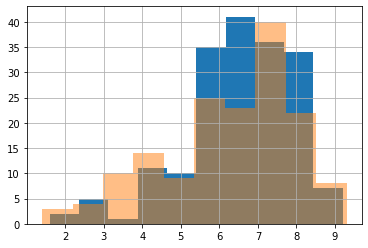

In [134]:
xbox['user_score'].hist()
pc['user_score'].hist(alpha=0.5);

#### Пользовательские рейтинги жанров
Проверим, что средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H0: cредние пользовательские рейтинги жанров Action и Sports равны (в нулевой гипотезе всегда должно быть использовано равенство).

Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports неравны.

Это две разные генеральные совокупности, они не зависят друг от друга. Значения дисперсий могут быть разные, так как сами выборки разного размера, пользователи, которые оставляли оценку играм, могут проживать в разных регионах и иметь разный менталитет. Проверим гипотезу с помощью t-test'a (критерия Стьюдента).

In [124]:
# выборка игр жанра Action с пользовательским рейтингом
action = data[(data['genre'] == 'action') & ~(data['user_score'].isna())]
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
17,grand theft auto: san andreas,ps2,2004,action,9.43,0.40,0.41,10.57,95.00,9.00,m,20.81
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
24,grand theft auto: vice city,ps2,2002,action,8.41,5.49,0.47,1.78,95.00,8.70,m,16.15
38,grand theft auto iii,ps2,2001,action,6.99,4.51,0.30,1.30,97.00,8.50,m,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...
16652,fast racing neo,wiiu,2016,action,0.00,0.01,0.00,0.00,81.00,8.50,e,0.01
16654,ben 10 omniverse 2,x360,2013,action,0.00,0.01,0.00,0.00,NaN,5.10,e10+,0.01
16660,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.00,6.70,no rating,0.01
16663,e.t. the extra-terrestrial,gba,2001,action,0.01,0.00,0.00,0.00,46.00,2.40,e,0.01


In [125]:
# выборка игр жанра Sports с пользовательским рейтингом
sports = data[(data['genre'] == 'sports') & ~(data['user_score'].isna())]
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.00,7.70,e,22.70
15,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.00,7.40,e,21.80
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.00,4.30,e,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,turbo: super stunt squad,x360,2013,sports,0.00,0.01,0.00,0.00,NaN,4.50,e,0.01
16518,rugby world cup 2015,pc,2015,sports,0.00,0.01,0.00,0.00,NaN,1.40,e,0.01
16528,pro evolution soccer 2010,pc,2009,sports,0.00,0.01,0.00,0.00,78.00,6.90,e,0.01
16546,wade hixton's counter punch,gba,2004,sports,0.01,0.00,0.00,0.00,78.00,9.50,t,0.01


In [126]:
# установим критический уровень статистической значимости 5%
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08991887133875968
Не получилось отвергнуть нулевую гипотезу


В результате вычислений мы не смогли отвергнуть нулевую гипотезу - средние пользовательские рейтинги двух жанров игр близки по значениям. Если просто расчитать средние, получим 7.0 и 6.9.

P-value 0.08 означает, что есть 8% вероятности, что результат обусловлен случайностью, что не соответствует действительности. Чем ниже значение p, тем более "нелепой" выглядит наша нулевая гипотеза. Наше p значение больше alpha, значит нет причин отвергать нулевую гипотезу.

In [127]:
print(action['user_score'].mean())
sports['user_score'].mean()

7.05648351648351


6.9563752276867055

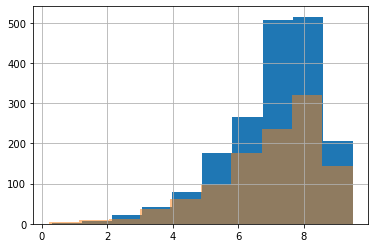

In [128]:
action['user_score'].hist()
sports['user_score'].hist(alpha=0.5);

### Общие выводы по исследованию
Проанализировав и подготовив данные для работы по продажам компьютерных игр в разных регионах и в разные года, получили следующее:
1. Игры в разное время создавались и продавались по-разному: пик продаж пришелся на 2005-2011 года.
2. Платформы-лидеры по продажам: PS2, DS, PS3, Wii, X360, PSP, PS.
3. Игры для каждой платформы популярны примерно 10 лет. Примерно с 2007 появляются несколько одновременно конкурирующих платформ: PS3, Wii, X360.
4. Рассматривая данные начиная с 2014 года и только лидеров-платформ, можно выделить следующие факты:
- лидируют по продажам платформы PS4, XOne, 3DS, PS3, X360
- 2 самые большие продажи игр (более 12 млн) у платформы PS4
- платформа Wii была с самыми долгими и стабильными продажами игр
- PS4 - платформа-лидер по общим продажам, у нее очень много игр "бестселлеров"
- есть достаточное количество игр с рейтингом критиков 60-80 из 100 и высоким количеством продаж. Также есть высоко оцененные игры, но с малым количеством продаж. И есть игра-бестселлер с самым высоким рейтингом и самым большим числом продаж
- оценки пользователей игр практически не влияют на общие продажи
5. Больше всего создано игр в жанрах: Action, Role-Playing, Adventure, Sports, Shooter. Меньше всего выпускали игр в жанрах Puzzle, Strategy и Platform.
6. Самый продаваемый жанр - Action, самый менее продаваемый жанр - Strategy.
7. Продажи игр в жанре Shooter самые высокие и стабильные в течение долгого времени.
8. В разных регионах предпочитают разные жанры игр и разные платформы:
- в NA больше всего любят Shooter, в EU - Action, в JP - Role-Playing
- больше трети всех игр жанра Role-Playing было продано в Японии, это самый популярный жанр в Японии среди всех игр - 30%
- больше половины игр жанра Shooter было продано в NA
- cамой популярной платформой в NA и в EU является PS4 компании Sony, а в Японии она на втором месте после 3DS компании Nintendo. В NA и в EU 3DS всего лишь на 4-м и 5-м месте по популярности 
- в NA и в EU популярна платформа XOne, а в Японии игры на этих платформах совсем непопулярны
- 53% всех игр на платформе PS4 продано в Европе, 40% в Северной Америке и только 6% в Японии
- самая популярная платформа в Японии 3DS занимает 47% продаж от всех других платформ
- 63% продаж всех игр на платформе XOne приходится на Северную Америку, 36% на Европу и 0,2% на Японию
- рейтинг ESRB присвоен чуть больше половине всех игр (56%). В NA и в EU доля купленных игр с рейтингом составляет 78% и 79% соответственно. В Японии только 39% проданных игр имеют рейтинг ESRB
9. Среди игр с рейтингом почти одинаковое количество игр для подростков (13+) и для взрослых (17+).
10. В NA и в EU больше всего продаж игр для взрослых (17+), в JP - игры для подростков (13+).
11. Проверив разные гипотезы, выяснили, что средние пользовательские рейтинги одинаковы для игр на платформах Xbox One и PC, средние пользовательские рейтинги жанров Action и Sports также почти одинаковы.

Если создавать новую игру для продажи в Северной Америке, лучше создать ее на платформе PS4 в жанре Shooter.
Для жителей Европы - жанр Action на платформе PS4. Эти игры должны быть для подростков от 17+.
Для японцев самая идеальная игра - в жанре RPG на 3DS. И эта игра должна быть для детей от 13 лет.